Import the dataset included with this assessment and stored it as a Pandas DataFrame. Print out the first five records

In [45]:
# Question 1:
import pandas as pd
df = pd.read_csv('student_enrollment_clean.csv')
df.head()


,EXPECTED_START_DATE,GRADUATION_DATE,ENROLL_COUNT,NUMBER_AVERAGE,HOURS_ATTEMPTED,HOURS_EARNED,AR_BALANCE_AMOUNT,DAYS_ABSENT,REENTRY_NUMBER,PROGRAM_GROUP,...,CREDITS_LEFT,ENROLLMENT_COUNT,MODS_ATTENDED_COUNT,HS_GRADUATED_FLAG,DISABLED_FLAG,HISPANIC_FLAG,VETERAN_FLAG,STATUS_DESCRIPTION,IN_SCHOOL_FLAG,SIMPLE_STATUS_DESCRIPTION
0,6/22/2020,6/23/2020,1,78.962963,450.0,450.0,0.0,0,0,BUBUD,...,-0.5,2,38,0,0,0,0,Graduate,0,Terminated
1,6/22/2020,12/19/2021,1,0.000000,0.0,0.0,0.0,0,0,MSMAA,...,95.0,1,0,0,0,1,0,No Show,0,Terminated
2,6/22/2020,10/24/2021,1,98.100000,710.0,710.0,2567.0,0,0,MSMAA,...,35.0,1,16,0,0,0,0,Active,1,Active
3,6/22/2020,6/27/2020,1,0.000000,0.0,0.0,0.0,0,0,CSISM,...,60.0,1,0,0,0,0,0,Cancel,0,Terminated
4,6/22/2020,7/14/2020,1,0.000000,0.0,0.0,0.0,0,0,MSMAA,...,95.0,1,0,0,0,0,0,False Start,0,Terminated


Let's begin by selecting only the columns we want. Reduce the dataframe down to include only the following columns: 

* STATUS_DESCRIPTION
* SIMPLE_STATUS_DESCRIPTION
* MOD_NUMBER
* GRADUATION_DATE
* CREDITS_ATTEMPTED
* CREDITS_EARNED
* DAYS_ABSENT
* PROGRAM_GROUP
* LAST_ACTIVITY_DATE
* ENROLLMENT_GPA
* HS_GRADUATED_FLAG


Print the first five records.

In [46]:
# Question 2:
df_reduced = df[['STATUS_DESCRIPTION', 'SIMPLE_STATUS_DESCRIPTION', 'MOD_NUMBER', 'GRADUATION_DATE', 
                 'CREDITS_ATTEMPTED', 'CREDITS_EARNED', 'DAYS_ABSENT', 'PROGRAM_GROUP', 
                 'LAST_ACTIVITY_DATE', 'ENROLLMENT_GPA', 'HS_GRADUATED_FLAG']]
df_reduced.head()



,STATUS_DESCRIPTION,SIMPLE_STATUS_DESCRIPTION,MOD_NUMBER,GRADUATION_DATE,CREDITS_ATTEMPTED,CREDITS_EARNED,DAYS_ABSENT,PROGRAM_GROUP,LAST_ACTIVITY_DATE,ENROLLMENT_GPA,HS_GRADUATED_FLAG
0,Graduate,Terminated,7,6/23/2020,40.5,40.5,0,BUBUD,2/8/2021,2.46,0
1,No Show,Terminated,7,12/19/2021,0.0,0.0,0,MSMAA,6/9/2020,0.00,0
2,Active,Active,7,10/24/2021,60.0,60.0,0,MSMAA,4/13/2021,3.91,0
3,Cancel,Terminated,7,6/27/2020,0.0,0.0,0,CSISM,10/22/2020,0.00,0
4,False Start,Terminated,7,7/14/2020,0.0,0.0,0,MSMAA,8/4/2020,0.00,0


Next, print the data types of each column. Notice that MOD_NUMBER is an integer. However, it refers to the number of the month of the year that the student is currently working on. We do not expect that MOD_NUMBER would have any sort of linear relationship with their current STATUS_DESCRIPTION. Therefore, convert it to an object so that it will be treated as a nominal/categorical feature.

Finally, print the entire list of data types once again.

In [47]:
# Question 3:
print("Data types before conversion:")
print(df_reduced.dtypes)

#print before
df['MOD_NUMBER'] = df['MOD_NUMBER'].astype('object')


print("\nData types after conversion:")
print(df_reduced.dtypes)
#print after - mod_number should change


Data types before conversion:
STATUS_DESCRIPTION            object
SIMPLE_STATUS_DESCRIPTION     object
MOD_NUMBER                     int64
GRADUATION_DATE               object
CREDITS_ATTEMPTED            float64
CREDITS_EARNED               float64
DAYS_ABSENT                    int64
PROGRAM_GROUP                 object
LAST_ACTIVITY_DATE            object
ENROLLMENT_GPA               float64
HS_GRADUATED_FLAG              int64
dtype: object

Data types after conversion:
STATUS_DESCRIPTION            object
SIMPLE_STATUS_DESCRIPTION     object
MOD_NUMBER                     int64
GRADUATION_DATE               object
CREDITS_ATTEMPTED            float64
CREDITS_EARNED               float64
DAYS_ABSENT                    int64
PROGRAM_GROUP                 object
LAST_ACTIVITY_DATE            object
ENROLLMENT_GPA               float64
HS_GRADUATED_FLAG              int64
dtype: object


Next, PROGRAM_GROUP refers to the name of the program that the student is enrolled in. For example, BUBAB refers to a Business Bachelor's degree. Print a count of the groups in the PROGRAM_GROUP feature.

Notice that some of the programs in this data have very few records. Create a routine that will identify any PROGRAM_GROUP value that has fewer than 5% of the records and recode those groups as 'OTHER'.

Print a barplot of your new groups.

PROGRAM_GROUP
GAGAB    12690
MSMAA    10717
HSHMB     6321
CSSMB     4622
CSCNB     4494
BUBAB     4371
GAWDB      912
ACACB      449
RTRCB       89
BUBUA       73
CSISM       53
NUNUB       41
MSMSA       36
BUBUD       23
HSSTA       17
CSCNA       15
RTRTA       12
NUNEA        7
BUBMA        6
GAGAA        6
NUNAM        5
BUBAM        2
HSHAM        1
HSPHM        1
NUNEM        1
CSNIB        1
Name: count, dtype: int64


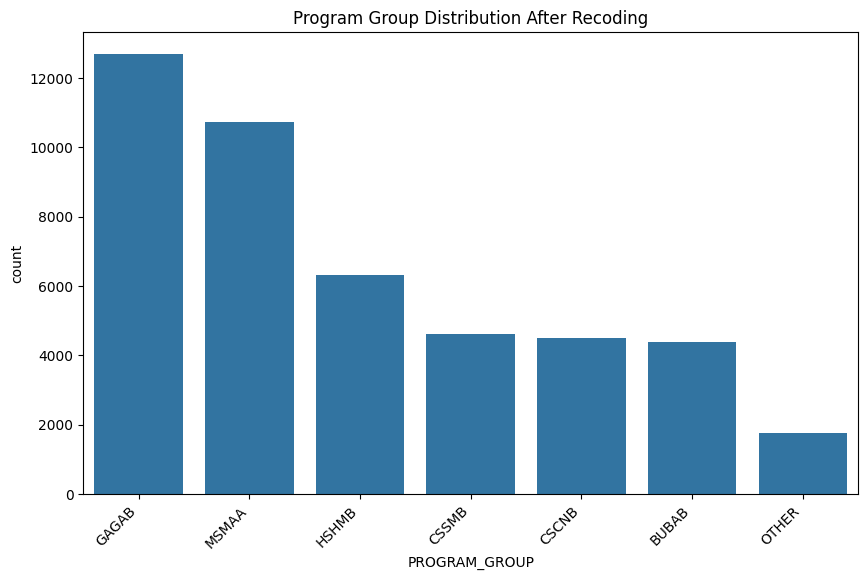

In [48]:
# Question 4:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Count the groups
program_group_counts = df['PROGRAM_GROUP'].value_counts()
print(program_group_counts)

# Step 2: Identify groups with fewer than 5% of the records and recode them as 'OTHER'
threshold = 0.05 * len(df)
small_groups = program_group_counts[program_group_counts < threshold].index
#this line creates a list of the group names where their count is less than the threshold value

# Recode those groups as 'OTHER'
df['PROGRAM_GROUP'] = df['PROGRAM_GROUP'].replace(small_groups, 'OTHER')

# Step 3: Print a barplot of the new groups
plt.figure(figsize=(10, 6))
sns.countplot(x='PROGRAM_GROUP', data=df, order=df['PROGRAM_GROUP'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Program Group Distribution After Recoding')
plt.show()